# Rozwiązanie problemu komiwojażera za pomocą algorytmu NN (nearest neighbor)
### Kajetan Łodej, WZ AGH I st.

In [2]:
import numpy as np
import pandas as pd

importowanie danych

In [8]:
dataMatrix = pd.read_excel('Dane_TSP_48.xlsx', header=None)
dataMatrix.head()


,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0,1495,381,2012,1157,990,764,178,147,1788,...,1117,261,692,1525,1104,616,2162,488,753,1184
1,1495,0,1135,637,583,2207,2056,1641,1590,736,...,976,1443,872,504,2223,1957,1098,1727,1388,661
2,381,1135,0,1633,778,1163,971,551,457,1412,...,785,325,442,1144,1231,850,1790,640,591,810
3,2012,637,1633,0,886,2550,2444,2175,2081,444,...,1161,1901,1467,532,2526,2373,594,2138,1695,900
4,1157,583,778,886,0,1686,1565,1329,1210,636,...,396,1021,768,370,1680,1489,1025,1253,839,97


implementacja algorytmu NN

In [10]:
def NN(dataMatrix, start, route=None):
    if route is None:
        route = []
        route.append(start)
        return NN(dataMatrix, start, route)
    else:
        if len(route) < len(dataMatrix):
            notVisitedCities = [i for i in range(len(dataMatrix)) if i not in route]
            lastCity = route[-1]
            distances = []
            for i in notVisitedCities:
                distances.append(dataMatrix[lastCity][i])
            nearestCity = notVisitedCities[np.argmin(distances)]
            route.append(nearestCity)
            return NN(dataMatrix, start, route)
        else:
            return route

In [11]:
# iteracja po wszystkich miastach jako miasto startowe i wybór najlepszego rozwiązania
def NNAll(dataMatrix):
    bestRoute = []
    bestDistance = 0
    for i in range(len(dataMatrix)):
        route = NN(dataMatrix, i)
        distance = 0
        for j in range(len(route) - 1):
            distance += dataMatrix[route[j]][route[j + 1]]
        distance += dataMatrix[route[-1]][route[0]]
        if bestDistance == 0 or distance < bestDistance:
            bestDistance = distance
            bestRoute = route
    return bestRoute, bestDistance

In [12]:
# wypisanie najlepszego rozwiązania
route, distance = NNAll(dataMatrix)
print("Najlepsza trasa: ", route)
print("Długość trasy: ", distance)


Najlepsza trasa:  [9, 23, 41, 4, 47, 38, 31, 20, 46, 10, 22, 13, 24, 12, 11, 14, 32, 45, 43, 17, 6, 27, 35, 29, 5, 36, 18, 26, 42, 16, 19, 39, 8, 0, 7, 37, 30, 21, 15, 2, 33, 40, 28, 1, 25, 3, 34, 44]
Długość trasy:  12012


In [18]:
dataMatrix76 = pd.read_excel('Dane_TSP_76.xlsx', header=None)
route, distance = NNAll(dataMatrix76)
print("Najlepsza trasa: ", route)
print("Długość trasy: ", distance)

Najlepsza trasa:  [15, 14, 12, 13, 11, 10, 16, 17, 36, 35, 34, 33, 39, 40, 59, 58, 57, 56, 62, 63, 61, 60, 54, 55, 50, 65, 64, 49, 48, 51, 52, 53, 41, 42, 27, 28, 29, 30, 18, 19, 4, 5, 6, 7, 8, 9, 3, 2, 1, 0, 22, 21, 20, 24, 23, 45, 44, 43, 47, 46, 68, 67, 66, 69, 70, 71, 72, 38, 37, 31, 32, 26, 25, 74, 75, 73]
Długość trasy:  130921.00457667322


In [19]:
dataMatrix127 = pd.read_excel('Dane_TSP_127.xlsx', header=None)
route, distance = NNAll(dataMatrix127)
print("Najlepsza trasa: ", route)
print("Długość trasy: ", distance)

Najlepsza trasa:  [116, 83, 80, 125, 81, 82, 74, 75, 77, 79, 78, 76, 17, 20, 16, 21, 3, 22, 23, 5, 105, 14, 107, 19, 18, 71, 7, 8, 10, 113, 104, 6, 0, 15, 1, 50, 56, 53, 44, 102, 43, 34, 35, 36, 40, 13, 11, 30, 26, 29, 42, 33, 38, 37, 25, 24, 32, 121, 27, 28, 31, 41, 39, 120, 4, 55, 123, 51, 49, 12, 114, 9, 119, 2, 89, 115, 59, 61, 60, 90, 57, 63, 99, 112, 65, 54, 46, 48, 52, 117, 47, 45, 93, 111, 110, 106, 126, 92, 94, 122, 96, 97, 100, 101, 62, 118, 95, 108, 86, 85, 84, 87, 109, 70, 69, 68, 67, 72, 73, 66, 58, 124, 88, 91, 98, 64, 103]
Długość trasy:  133970.64577239772


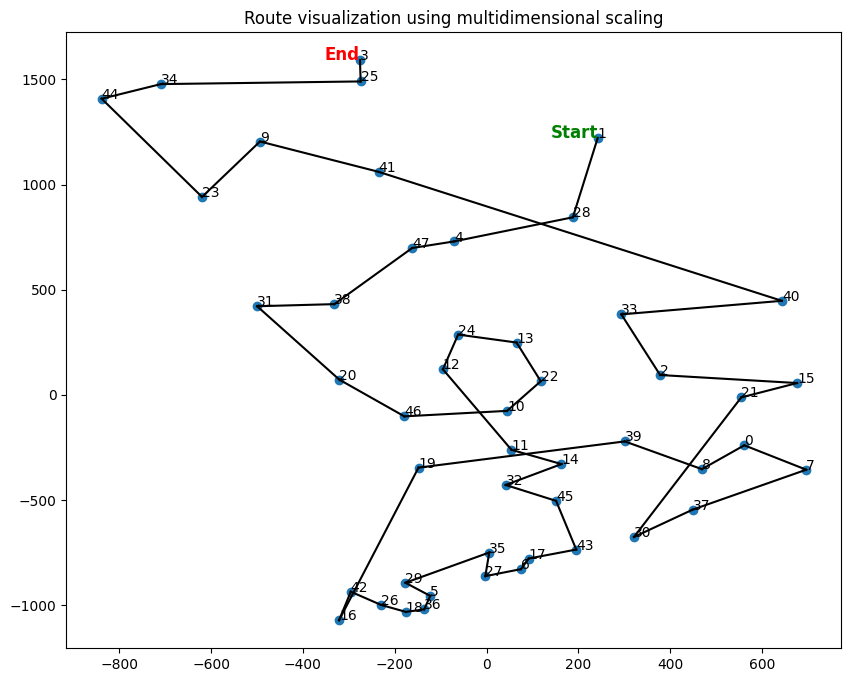

In [ ]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Assuming 'dane' is your distance matrix
dane = pd.DataFrame(dataMatrix)

# Step 2: Apply MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42,normalized_stress='auto')
coordinates = mds.fit_transform(dane)

# Step 3: Plot the results
plt.figure(figsize=(10, 8))
plt.scatter(coordinates[:, 0], coordinates[:, 1])

# Annotate each point with its city index
for i, txt in enumerate(range(len(coordinates))):
    plt.annotate(txt, (coordinates[i, 0], coordinates[i, 1]))

# Draw lines connecting cities in the specified order
for i in range(len(order) - 1):
    plt.plot([coordinates[order[i], 0], coordinates[order[i + 1], 0]],
             [coordinates[order[i], 1], coordinates[order[i + 1], 1]], 'k-')

# Annotate start and end points with color and bold
plt.text(coordinates[order[0], 0], coordinates[order[0], 1], 'Start', fontsize=12, ha='right', color='green', weight='bold')
plt.text(coordinates[order[-1], 0], coordinates[order[-1], 1], 'End', fontsize=12, ha='right', color='red', weight='bold')

plt.title('Route visualization using multidimensional scaling')
plt.show()
